   <h1>K-Means Clustering</h1>

K-means clustering is a unsupervised learning algorthim that tries to find a function that generalizes the data to some degree. 

Using a predefined K, which is the number of clusters that one wants to split the data into, k-means will find the most optimal centroids of clusters. 

<H2>How does it work?</H2>

1. Choose a centroid (point) in space.
2. assign each feature vector to the closest centroid
3. Let L sub i be the set of all feature vectors assign to centroid i. 
4. the new center is the average of the feature vectors assigned to that class
5. repeat 2,3, 4 until the centroids stop moving. 

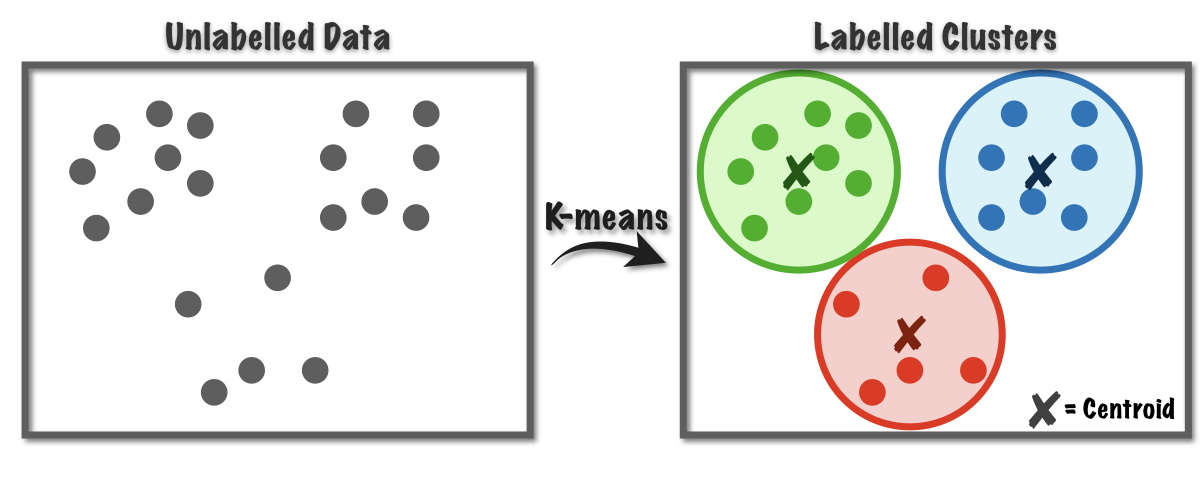

To contruct K-means clusters we need to have some sort of measurement for distance fromt the center. For this we can use Euclidean Distance. Lets see how we can implement K-means clustering with the wine data.


In [243]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

In [244]:
data = load_wine()

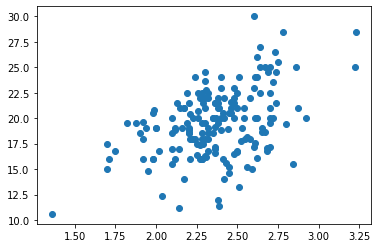

In [245]:
X = data['data']
x = X[:,2:4]

plt.scatter(x[:, 0], x[:, 1])
k = 3
#part 1 of algorithm
k = 3
C = []
for _ in range(k):
    i = np.random.randint(len(x))
    C.append(x[i, :])

As we can see in the above diagram, the data is unlabeled. We have set our k = 3 meaning we will cluster our data into 3 groups.

In [235]:
def distance(p, q): 
    return np.sqrt((p-q)@(p-q))

Our Eucledian formula will be used to measure the distance to the closest centroid.

In [246]:
p = x[0, :]
c = []
L = dict()
for i in range(3):
    L[i] = []
    

In [247]:
for p in x:
    distances = np.array([distance(p, centroid)for centroid in C])
    assigment = np.argmin(distances)
    print(f"{p} is assgined label {assigment}")
    
    L[assigment].append(p)
    if assigment == 0:
        c.append("red")
    elif assigment == 1:
        c.append("blue")
    else:
        c.append("green")

[ 2.43 15.6 ] is assgined label 1
[ 2.14 11.2 ] is assgined label 1
[ 2.67 18.6 ] is assgined label 1
[ 2.5 16.8] is assgined label 1
[ 2.87 21.  ] is assgined label 1
[ 2.45 15.2 ] is assgined label 1
[ 2.45 14.6 ] is assgined label 1
[ 2.61 17.6 ] is assgined label 1
[ 2.17 14.  ] is assgined label 1
[ 2.27 16.  ] is assgined label 1
[ 2.3 18. ] is assgined label 1
[ 2.32 16.8 ] is assgined label 1
[ 2.41 16.  ] is assgined label 1
[ 2.39 11.4 ] is assgined label 1
[ 2.38 12.  ] is assgined label 1
[ 2.7 17.2] is assgined label 1
[ 2.72 20.  ] is assgined label 1
[ 2.62 20.  ] is assgined label 1
[ 2.48 16.5 ] is assgined label 1
[ 2.56 15.2 ] is assgined label 1
[ 2.28 16.  ] is assgined label 1
[ 2.65 18.6 ] is assgined label 1
[ 2.36 16.6 ] is assgined label 1
[ 2.52 17.8 ] is assgined label 1
[ 2.61 20.  ] is assgined label 1
[ 3.22 25.  ] is assgined label 2
[ 2.62 16.1 ] is assgined label 1
[ 2.14 17.  ] is assgined label 1
[ 2.8 19.4] is assgined label 1
[ 2.21 16.  ] is assgi

Each feature vector is assigned to a centroid. We can then plot them and see how they look like.

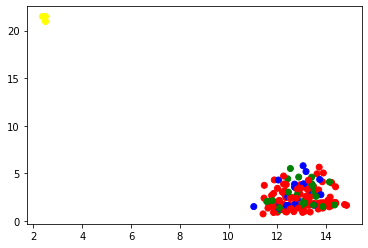

In [238]:
plt.scatter(X[:, 0], X[:, 1], color = c)
plt.scatter([c[0] for c in C], [c[1] for c in C], color = "yellow")

Our 3 centroids are represented by our yellow points. Our three groups are represented by blue, red and green dots.

In [241]:
for i, _ in enumerate(C):
    C[i] = sum(L[i])/len(L[i])

In [242]:
C

[array([ 2.30883721, 17.9503876 ]),
 array([ 2.3052381 , 22.42380952]),
 array([ 2.67821429, 24.41428571])]

C represents our new center of the feature vectors assigned to each of the classes. At this point the algorithm has finised as the assignment of instances to clusters no longer changes.